Saving Screenshot 2025-09-06 160902.png to Screenshot 2025-09-06 160902.png


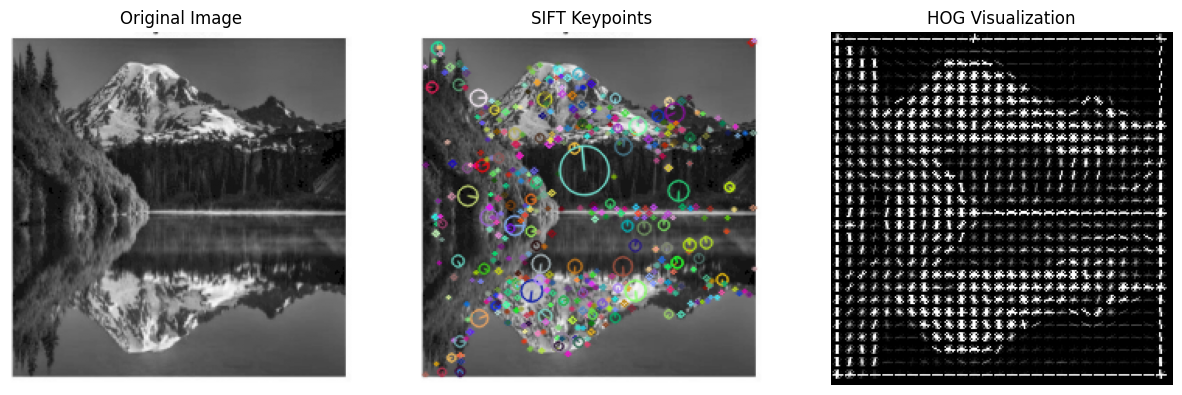

In [ ]:

# Install required packages (run once)
!pip install opencv-contrib-python scikit-image matplotlib

import cv2
import matplotlib.pyplot as plt
from skimage.feature import hog
from skimage import exposure
from google.colab import files
import numpy as np

# Upload image
uploaded = files.upload()
filename = list(uploaded.keys())[0]

# Load image in grayscale
img = cv2.imread(filename, cv2.IMREAD_GRAYSCALE)

# -------- SIFT Feature Detection --------
sift = cv2.SIFT_create()
keypoints, descriptors = sift.detectAndCompute(img, None)

# Draw keypoints
img_sift = cv2.drawKeypoints(img, keypoints, None, flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)

# -------- HOG Feature Extraction --------
fd, hog_image = hog(img, orientations=9, pixels_per_cell=(8, 8),
                    cells_per_block=(2, 2), visualize=True, block_norm='L2-Hys')

# Rescale histogram for better display
hog_image_rescaled = exposure.rescale_intensity(hog_image, in_range=(0, 10))

# -------- Display results --------
plt.figure(figsize=(15, 8))

plt.subplot(1, 3, 1)
plt.title('Original Image')
plt.axis('off')
plt.imshow(img, cmap='gray')

plt.subplot(1, 3, 2)
plt.title('SIFT Keypoints')
plt.axis('off')
plt.imshow(img_sift)

plt.subplot(1, 3, 3)
plt.title('HOG Visualization')
plt.axis('off')
plt.imshow(hog_image_rescaled, cmap='gray')

plt.show()
